<a href="https://colab.research.google.com/github/Captsahil/Marketing-Research-Method-Sahil-Bharadwaj/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Feature Importance:
       Feature  Coefficient  Absolute_Coefficient
11   duration     1.016261              1.016261
8     contact    -0.592128              0.592128
6     housing    -0.516335              0.516335
12   campaign    -0.394321              0.394321
13      pdays     0.354342              0.354342
7        loan    -0.247865              0.247865
15   poutcome     0.209071              0.209071
14   previous     0.207309              0.207309
3   education     0.135767              0.135767
2     marital     0.128947              0.128947
10      month     0.112184              0.112184
0         age     0.096714              0.096714
4     default    -0.057452              0.057452
5     balance     0.047613              0.047613
9         day    -0.040551              0.040551
1         job     0.029134              0.029134


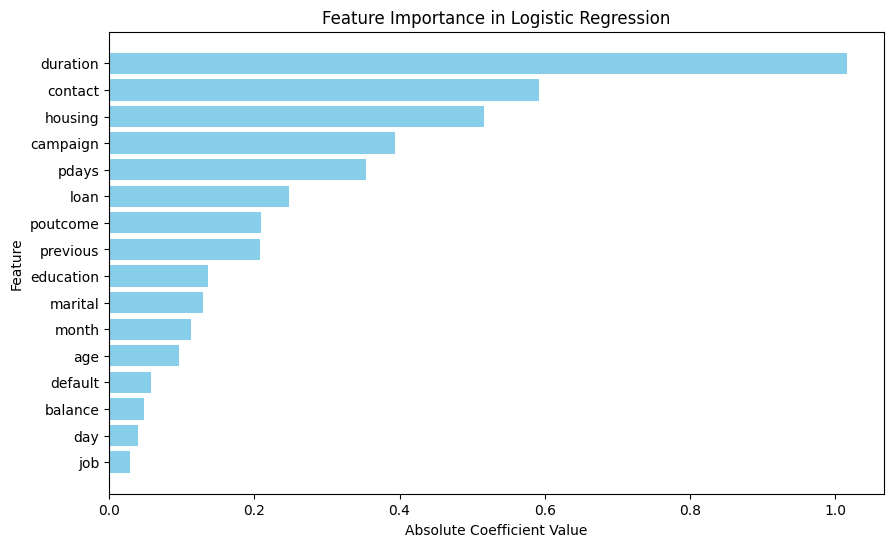

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
file_path = "/content/bank-full.csv"
df = pd.read_csv(file_path)

# Convert categorical variables to numerical using Label Encoding
categorical_columns = ['job', 'marital', 'education', 'default', 'housing',
                       'loan', 'contact', 'poutcome', 'y', 'month']  # Added 'month'
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save label encoders if needed

# Define independent variables (X) and target variable (y)
X = df.drop(columns=['y'])  # Features
y = df['y']  # Target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Get feature importance (coefficients)
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
feature_importance['Absolute_Coefficient'] = feature_importance['Coefficient'].abs()

# Sort by absolute coefficient value
feature_importance = feature_importance.sort_values(by='Absolute_Coefficient', ascending=False)

# Display feature importance
print("Feature Importance:\n", feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Absolute_Coefficient'], color='skyblue')
plt.xlabel("Absolute Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importance in Logistic Regression")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()
